<a href="https://colab.research.google.com/github/chenansc14-rgb/Chen-chung-an/blob/main/week_2_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def runge(x):
    return 1.0/(1.0 + 25.0*x*x)

def natural_cubic_spline_coeffs(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    n = len(x)
    if n < 2:
        raise ValueError("Need at least two points for a spline.")
    h = np.diff(x)  # n-1
    if np.any(h <= 0):
        raise ValueError("x must be strictly increasing.")

    a = y.copy()
    alpha = np.zeros(n)
    for i in range(1, n-1):
        alpha[i] = (3.0/h[i])*(a[i+1]-a[i]) - (3.0/h[i-1])*(a[i]-a[i-1])

    l = np.ones(n)
    mu = np.zeros(n)
    z = np.zeros(n)
    for i in range(1, n-1):
        l[i] = 2.0*(x[i+1]-x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]

    c = np.zeros(n)
    b = np.zeros(n-1)
    d = np.zeros(n-1)
    for j in range(n-2, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1]-a[j])/h[j] - h[j]*(c[j+1]+2.0*c[j])/3.0
        d[j] = (c[j+1]-c[j])/(3.0*h[j])
    return a[:-1], b, c[:-1], d

def eval_spline(x, coeffs, t):
    a, b, c, d = coeffs
    x = np.asarray(x, dtype=float)
    t = np.asarray(t, dtype=float)
    n = len(x)
    idx = np.searchsorted(x, t, side='right') - 1
    idx = np.clip(idx, 0, n-2)
    dt = t - x[idx]
    return a[idx] + b[idx]*dt + c[idx]*dt**2 + d[idx]*dt**3



In [ ]:
n = 100
xs = np.linspace(-1.0, 1.0, n)
ys = runge(xs)
coeffs = natural_cubic_spline_coeffs(xs, ys)
xx = np.linspace(-1.0, 1.0, 1000)
fxx = runge(xx)
sxx = eval_spline(xs, coeffs, xx)


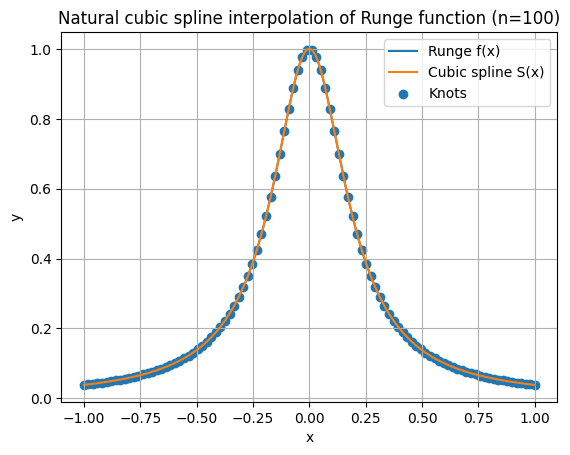

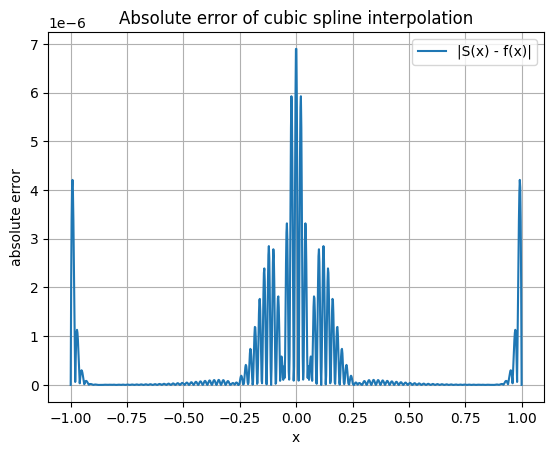

In [ ]:
plt.figure()
plt.plot(xx, fxx, label="Runge f(x)")
plt.plot(xx, sxx, label="Cubic spline S(x)")
plt.scatter(xs, ys, marker='o', label="Knots")
plt.title(f"Natural cubic spline interpolation of Runge function (n={n})")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
plt.figure()
plt.plot(xx, np.abs(sxx - fxx), label="|S(x) - f(x)|")
plt.title("Absolute error of cubic spline interpolation")
plt.xlabel("x")
plt.ylabel("absolute error")
plt.legend()
plt.grid(True)
plt.show()
